# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [1]:
import pandas as pd
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]


In [2]:
documents[0].lower().strip('.')

'el gato se escondió debajo de la cama'

In [3]:
vocabulary = set() #conjunto no tiene indicies y no tiene elementos duplicados

for doc in documents: # Iterar sobre cada documento
    for word in doc.lower().strip('.').split(): # Iterar sobre cada  palabra en el documento
        
        vocabulary.add(word) # Agregar la palabra al vocabulario       
print((vocabulary))


{'limpieza', 'cómoda', 'de', 'importante', 'jugaron', 'y', 'la', 'cama', 'debajo', 'es', 'en', 'escondió', 'estaba', 'el', 'limpia', 'perro', 'jardín', 'gato', 'del', 'se'}


In [4]:
dict_tf={}
i=0
for doc in documents:
    dict_tfd={} # Crear un diccionario para cada documento
    for term in vocabulary:
            count=doc.lower().strip('.').count(term)
            dict_tfd[term]=count
    print(doc, dict_tfd)
    dict_tf[i]=dict_tfd # Agregar el diccionario del documento al diccionario de términos
    i += 1
print(dict_tf)	


El gato se escondió debajo de la cama. {'limpieza': 0, 'cómoda': 0, 'de': 2, 'importante': 0, 'jugaron': 0, 'y': 0, 'la': 1, 'cama': 1, 'debajo': 1, 'es': 1, 'en': 0, 'escondió': 1, 'estaba': 0, 'el': 1, 'limpia': 0, 'perro': 0, 'jardín': 0, 'gato': 1, 'del': 0, 'se': 1}
La cama estaba limpia y cómoda. {'limpieza': 0, 'cómoda': 1, 'de': 0, 'importante': 0, 'jugaron': 0, 'y': 1, 'la': 1, 'cama': 1, 'debajo': 0, 'es': 1, 'en': 0, 'escondió': 0, 'estaba': 1, 'el': 0, 'limpia': 1, 'perro': 0, 'jardín': 0, 'gato': 0, 'del': 0, 'se': 0}
El perro y el gato jugaron en el jardín. {'limpieza': 0, 'cómoda': 0, 'de': 0, 'importante': 0, 'jugaron': 1, 'y': 1, 'la': 0, 'cama': 0, 'debajo': 0, 'es': 0, 'en': 1, 'escondió': 0, 'estaba': 0, 'el': 3, 'limpia': 0, 'perro': 1, 'jardín': 1, 'gato': 1, 'del': 0, 'se': 0}
La limpieza del jardín es importante. {'limpieza': 1, 'cómoda': 0, 'de': 1, 'importante': 1, 'jugaron': 0, 'y': 0, 'la': 1, 'cama': 0, 'debajo': 0, 'es': 1, 'en': 0, 'escondió': 0, 'estaba'

In [5]:
matriz = pd.DataFrame(dict_tf)
matriz

,0,1,2,3
limpieza,0,0,0,1
cómoda,0,1,0,0
de,2,0,0,1
importante,0,0,0,1
jugaron,0,0,1,0
y,0,1,1,0
la,1,1,0,1
cama,1,1,0,0
debajo,1,0,0,0
es,1,1,0,1


In [6]:
matriz[0]['del']
matriz.to_csv('matriz.csv', index=True) # Guardar la matriz en un archivo Excel

In [7]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ELI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ELI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-1.07928449,  1.73739882],
       [-1.35204195, -1.83917526],
       [ 2.79812836, -0.18141402],
       [-0.36680192,  0.28319046]])

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

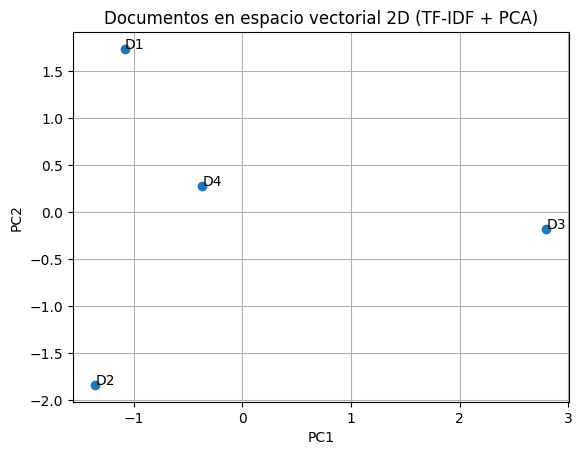

In [11]:
# Representación TF


# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d


plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# Reducción PCA y visualización 3D

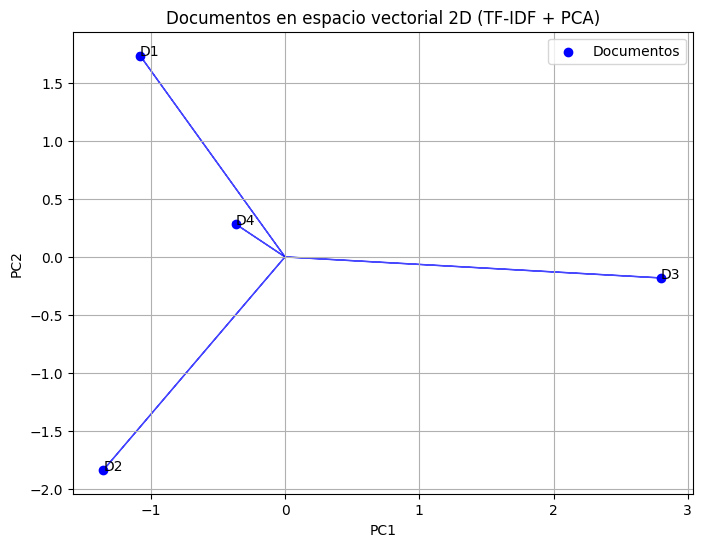

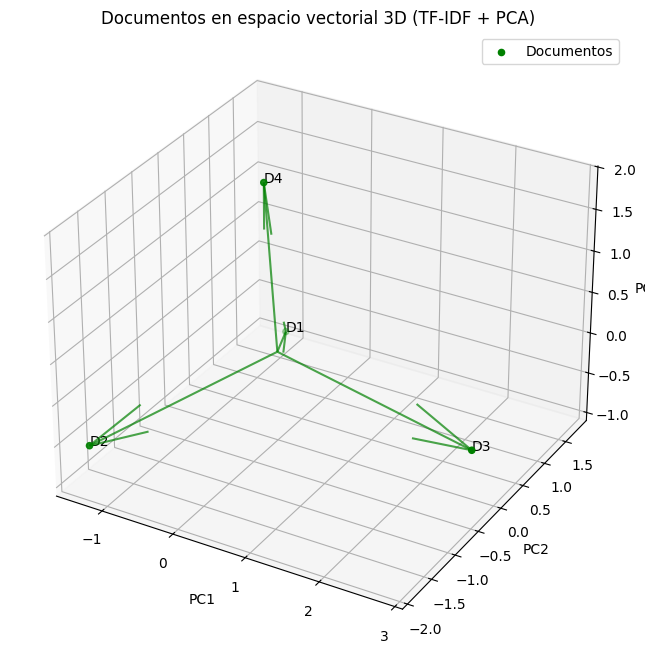

In [12]:
pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(matriz.T)

plt.figure(figsize=(8, 6))
plt.scatter(docs_2d[:, 0], docs_2d[:, 1], color='blue', label="Documentos")
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i, 0], docs_2d[i, 1]))
    plt.arrow(0, 0, docs_2d[i, 0], docs_2d[i, 1], color='blue', head_width=0.02, alpha=0.7)  # Flechas desde el origen
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.legend()
plt.show()

# Reducción PCA y visualización 3D
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz.T)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2], color='green', label="Documentos")
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)
    ax.quiver(0, 0, 0, docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], color='green', alpha=0.7)  # Flechas desde el origen
ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()



In [13]:
from mpl_toolkits.mplot3d import Axes3D

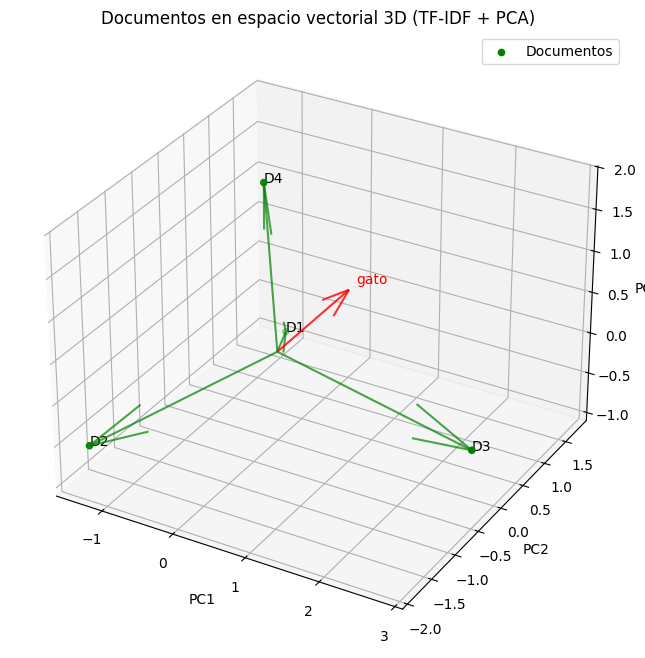

In [14]:
# Aplicar PCA
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz.T)

# Obtener el vector de "gato"
vector_gato = matriz.loc["gato"].values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2], color='green', label="Documentos")

for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)
for i in range(len(docs_3d)):
    ax.quiver(0, 0, 0, docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], color='green', alpha=0.7)

# Añadir el vector de "gato" como una flecha
ax.quiver(0, 0, 0, vector_gato[0], vector_gato[1], vector_gato[2], color='red', alpha=0.8)


ax.text(vector_gato[0] * 1.1, vector_gato[1] * 1.1, vector_gato[2] * 1.1, "gato", fontsize=10, color='red')
ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Consulta fija
consulta = "El perro y gato el jardín.".lower().strip('.')  
consulta_vector = {}
for term in vocabulary:
    count = consulta.count(term)
    consulta_vector[term] = count

# Convertimos la consulta en un vector en el mismo orden que los documentos
consulta_vector = [consulta_vector[term] for term in vocabulary]

# 3. Calcular similitud de coseno entre la consulta y cada documento

document_vectors = []
for doc in documents:
    doc_vector = {}
    for term in vocabulary:
        count = doc.lower().strip('.').count(term)
        doc_vector[term] = count
    doc_vector = [doc_vector[term] for term in vocabulary]
    document_vectors.append(doc_vector)

consulta_array = np.array(consulta_vector).reshape(1, -1)
document_arrays = np.array(document_vectors)

# Calculamos la similitud de coseno
similitudes = cosine_similarity(consulta_array, document_arrays)

# Mostrar la similitud entre la consulta y cada documento
for i, sim in enumerate(similitudes[0]):
    print(f"Similitud coseno entre la consulta y Documento {i+1}: {sim:.4f}")

Similitud coseno entre la consulta y Documento 1: 0.3062
Similitud coseno entre la consulta y Documento 2: 0.1336
Similitud coseno entre la consulta y Documento 3: 0.9129
Similitud coseno entre la consulta y Documento 4: 0.3750


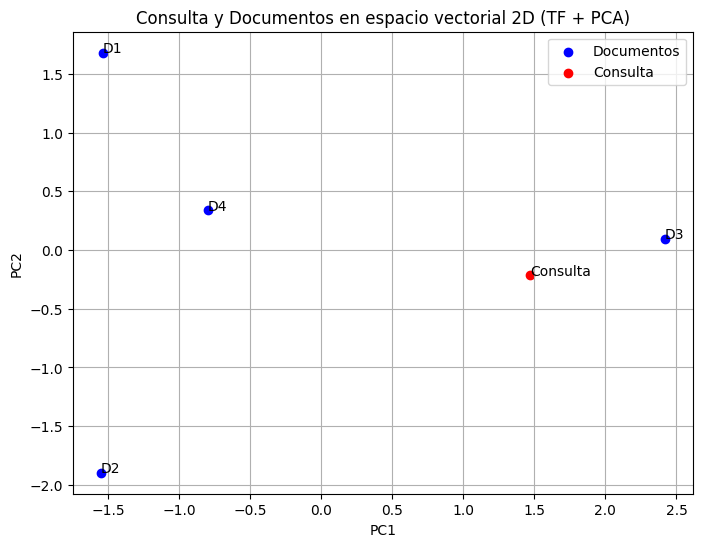

In [22]:
# 4. Reducción de dimensionalidad con PCA (2D)
pca = PCA(n_components=2)
all_vectors = document_vectors + [consulta_vector]  # Añadimos la consulta a los documentos
reduced_vectors = pca.fit_transform(all_vectors)

# 5. Visualización 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:-1, 0], reduced_vectors[:-1, 1], color='blue', label='Documentos')  # Documentos
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], color='red', label='Consulta')  # Consulta

# Etiquetas para los documentos
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Etiqueta para la consulta
plt.annotate("Consulta", (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title("Consulta y Documentos en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.legend()
plt.show()

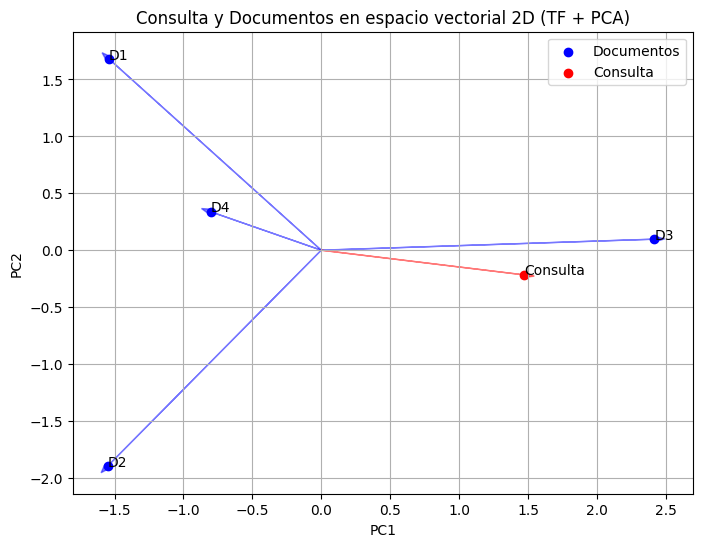

In [23]:
plt.figure(figsize=(8, 6))

# Plot de los documentos
plt.scatter(reduced_vectors[:-1, 0], reduced_vectors[:-1, 1], color='blue', label='Documentos')  # Documentos
# Plot de la consulta
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], color='red', label='Consulta')  # Consulta

# Añadir las flechas (líneas) desde el origen a los puntos
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    # Flechas desde el origen a los documentos
    plt.arrow(0, 0, reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue', head_width=0.05, alpha=0.5)

# Flecha para la consulta
plt.annotate("Consulta", (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))
plt.arrow(0, 0, reduced_vectors[-1, 0], reduced_vectors[-1, 1], color='red', head_width=0.05, alpha=0.5)

# Título y etiquetas
plt.title("Consulta y Documentos en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.legend()
plt.show()

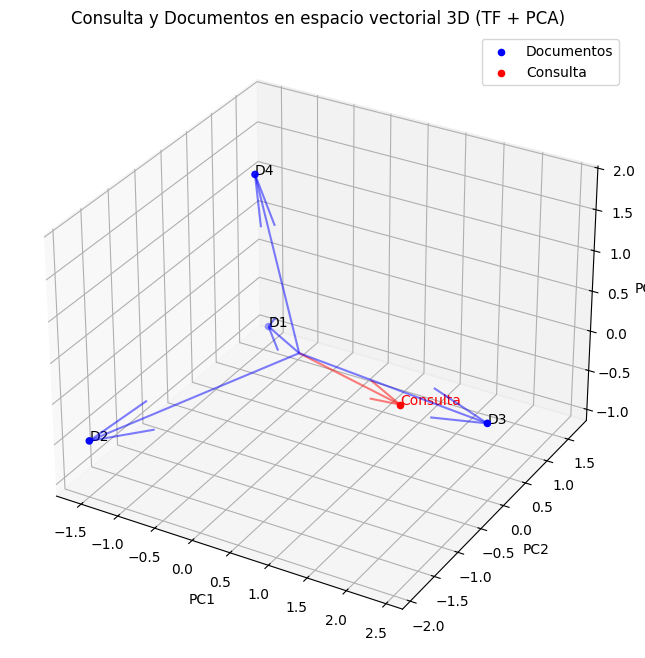

In [24]:
# 4. Reducción de dimensionalidad con PCA (3D)
pca_3d = PCA(n_components=3)
all_vectors = document_vectors + [consulta_vector]  # Añadimos la consulta a los documentos
reduced_vectors_3d = pca_3d.fit_transform(all_vectors)

# 5. Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot de los documentos
ax.scatter(reduced_vectors_3d[:-1, 0], reduced_vectors_3d[:-1, 1], reduced_vectors_3d[:-1, 2], color='blue', label='Documentos')  # Documentos
# Plot de la consulta
ax.scatter(reduced_vectors_3d[-1, 0], reduced_vectors_3d[-1, 1], reduced_vectors_3d[-1, 2], color='red', label='Consulta')  # Consulta

# Añadir las flechas (líneas) desde el origen a los puntos de los documentos
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(reduced_vectors_3d[i, 0], reduced_vectors_3d[i, 1], reduced_vectors_3d[i, 2], txt)
    # Flechas desde el origen a los documentos
    ax.quiver(0, 0, 0, reduced_vectors_3d[i, 0], reduced_vectors_3d[i, 1], reduced_vectors_3d[i, 2], color='blue', alpha=0.5)

# Flecha para la consulta
ax.text(reduced_vectors_3d[-1, 0], reduced_vectors_3d[-1, 1], reduced_vectors_3d[-1, 2], "Consulta", fontsize=10, color='red')
ax.quiver(0, 0, 0, reduced_vectors_3d[-1, 0], reduced_vectors_3d[-1, 1], reduced_vectors_3d[-1, 2], color='red', alpha=0.5)

# Título y etiquetas
ax.set_title("Consulta y Documentos en espacio vectorial 3D (TF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [30]:
# 1. Crear la función para obtener la similitud coseno entre la consulta y los documentos
def consulta_por_similitud(consulta_vector, document_vectors):
    consulta_vector = consulta_vector.reshape(1, -1)
    # Calcular la similitud coseno entre la consulta y los documentos
    similarities = cosine_similarity(consulta_vector, document_vectors)
    ranked_documents = sorted(enumerate(similarities[0]), key=lambda x: x[1], reverse=True)
    
    return ranked_documents, similarities

consulta_vector = np.array(consulta_vector)  # Asegurarse de que es un vector numpy
document_vectors_np = np.array(document_vectors)  # Convertir la lista de documentos en un array de NumPy

ranked_documents, similarities = consulta_por_similitud(consulta_vector, document_vectors_np)

print("Ranking de documentos (por similitud coseno):")
for i, (index, similarity) in enumerate(ranked_documents):
    print(f"Ranking #{i+1}: Documento {index+1} con similitud {similarity:.4f}")

# 4. Visualización de similitud
for i, (index, similarity) in enumerate(ranked_documents):
    print(f"\n Documento {index+1}: Similaridad {similarity:.4f}")

Ranking de documentos (por similitud coseno):
Ranking #1: Documento 3 con similitud 0.9129
Ranking #2: Documento 4 con similitud 0.3750
Ranking #3: Documento 1 con similitud 0.3062
Ranking #4: Documento 2 con similitud 0.1336

 Documento 3: Similaridad 0.9129

 Documento 4: Similaridad 0.3750

 Documento 1: Similaridad 0.3062

 Documento 2: Similaridad 0.1336


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización TF-IDF de los documentos y la consulta
vectorizer = TfidfVectorizer()
all_text = documents + [consulta]  # Combinar documentos y consulta
tfidf_matrix = vectorizer.fit_transform(all_text)

docs_2d = tfidf_matrix[:-1].toarray()

# El vector de la consulta
query_2d = tfidf_matrix[-1].toarray()

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
all_vectors = np.vstack([docs_2d, query_2d])  
reduced_vectors = pca.fit_transform(all_vectors)  

docs_2d = reduced_vectors[:-1]  # Vectores de los documentos
query_2d = reduced_vectors[-1]  # Vector de la consulta

origins = np.zeros((len(docs_2d) + 1, 2))  

# Vectores de documentos y consulta
vectors = np.vstack([docs_2d, query_2d])
colors = ['blue'] * len(docs_2d) + ['red']

# Crear la figura para el gráfico
plt.figure(figsize=(8, 6))

# Dibujar todos los vectores de una sola vez con quiver
Q = plt.quiver(origins[:, 0], origins[:, 1], 
               vectors[:, 0], vectors[:, 1], 
               color=colors, angles='xy', scale_units='xy', scale=0.5,
               width=0.005, headwidth=10)

# Etiquetas simples
labels = [f"D{i+1}" for i in range(len(docs_2d))] + ["Consulta"]
for i, (x, y) in enumerate(vectors):
    plt.text(x*1.1, y*1.1, labels[i], 
             color=colors[i], fontweight='bold', fontsize=11)

# Configuración básica
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Documentos y Consulta (TF-IDF + PCA)")
plt.axis('equal')  # Mantener escala igual en ambos ejes

# Ajustar los límites para que se vea todo
margin = 1.5
plt.xlim(vectors[:, 0].min() * margin, vectors[:, 0].max() * margin)
plt.ylim(vectors[:, 1].min() * margin, vectors[:, 1].max() * margin)

# Mostrar el gráfico
plt.show()

IndexError: index 4 is out of bounds for axis 1 with size 2

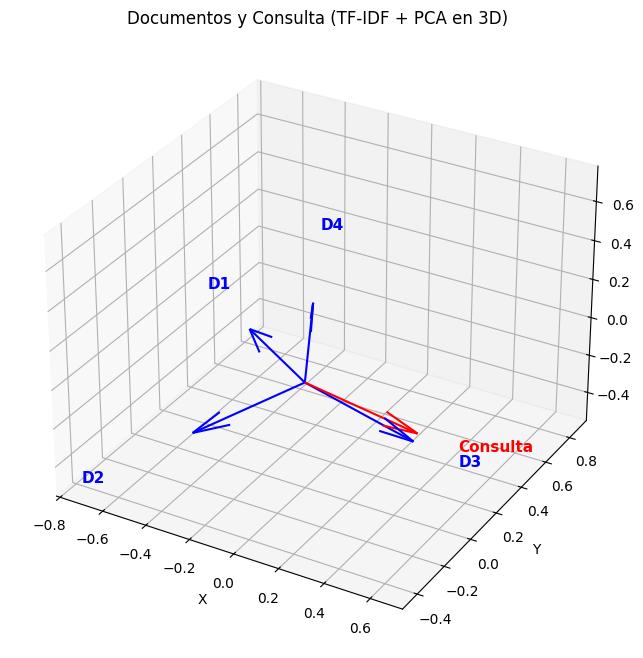

In [39]:


# Los vectores de los documentos (sin incluir la consulta)
docs_2d = tfidf_matrix[:-1].toarray()

# El vector de la consulta
query_2d = tfidf_matrix[-1].toarray()
# Reducir la dimensionalidad a 3D usando PCA
pca = PCA(n_components=3)
all_vectors = np.vstack([docs_2d, query_2d])  # Unir los vectores de los documentos y la consulta
reduced_vectors = pca.fit_transform(all_vectors)  # Reducir a 3D

# Separar los vectores reducidos
docs_3d = reduced_vectors[:-1]  # Vectores de los documentos
query_3d = reduced_vectors[-1]  # Vector de la consulta

# Origen para todos los vectores
origins = np.zeros((len(docs_3d) + 1, 3))  # +1 para la consulta

# Vectores de documentos y consulta
vectors = np.vstack([docs_3d, query_3d])
colors = ['blue'] * len(docs_3d) + ['red']

# Crear la figura para el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar todos los vectores de una sola vez con quiver
ax.quiver(origins[:, 0], origins[:, 1], origins[:, 2], 
          vectors[:, 0], vectors[:, 1], vectors[:, 2], 
          color=colors, length=0.5, normalize=True)

# Etiquetas
labels = [f"D{i+1}" for i in range(len(docs_3d))] + ["Consulta"]
for i, (x, y, z) in enumerate(vectors):
    ax.text(x*1.1, y*1.1, z*1.1, labels[i], 
            color=colors[i], fontweight='bold', fontsize=11)

# Configuración básica
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Documentos y Consulta (TF-IDF + PCA en 3D)")

# Ajustar los límites para que se vea todo
margin = 1.2
ax.set_xlim(vectors[:, 0].min() * margin, vectors[:, 0].max() * margin)
ax.set_ylim(vectors[:, 1].min() * margin, vectors[:, 1].max() * margin)
ax.set_zlim(vectors[:, 2].min() * margin, vectors[:, 2].max() * margin)

# Mostrar el gráfico
plt.show()